# Thesis Fisher info plots - 5Try - M / Ratio_conj + comparison

5/5


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import collections
import cPickle as pickle

from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data
import em_circularmixture_parametrickappa


# import matplotlib.animation as plt_anim
from mpl_toolkits.mplot3d import Axes3D

import re
import inspect
import imp

import utils
import load_experimental_data

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

In [11]:
overwrite = False
cache_filename = ("/nfs/data3/lmatthey/visual_working_mem/fisherinfo_new_2016/"
                  "fisher2016_random_Mratio_5try_fixed_repetitions10_240818/outputs/df_out.pkl")

if os.path.exists(cache_filename) and not overwrite:
    import reloader_fisher2016_random_Mratio_5try_240818 as rel
    generator_module = rel.generator_module
    dataset_infos = rel.dataset_infos
    df_all_fits = pd.read_pickle(cache_filename)
else:
    with io.capture_output(display=False, stdout=True) as captured:
        %run reloader_fisher2016_random_Mratio_5try_240818.py

In [12]:
dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', 
                label='thesis_' + dataset_infos['save_output_filename'])
dataio.make_link_output_to_dropbox(dropbox_current_experiment_folder='fisherinfo_new_2016')

=== FileIO ready: /nfs/data3/lmatthey/visual_working_mem/fisherinfo_new_2016/fisher2016_random_Mratio_5try_fixed_repetitions10_240818/outputs/thesis_mratio_rnd-<module>-72644a18-deb6-40a4-9b83-9da3e129a5fa ===
Doing dropbox symlink:  /nfs/data3/lmatthey/visual_working_mem/fisherinfo_new_2016/fisher2016_random_Mratio_5try_fixed_repetitions10_240818/outputs/ /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/fisherinfo_new_2016/fisher2016_random_Mratio_5try_fixed_repetitions10_240818_outputs
Symlink failed:  /nfs/data3/lmatthey/visual_working_mem/fisherinfo_new_2016/fisher2016_random_Mratio_5try_fixed_repetitions10_240818/outputs/ /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/fisherinfo_new_2016/fisher2016_random_Mratio_5try_fixed_repetitions10_240818_outputs


In [13]:
# # Processing into an averaged Pandas DF

# def avgstd_axis(array_name, array, axis=-1, out=None):
#     if out is None:
#         out = []
#     out.append((array_name, utils.nanmean(array, axis=axis)))
#     out.append((array_name + '_sigma', utils.nanstd(array, axis=axis)))
#     return out

# def avgstd_discardsecondlastaxis(array_name, array, axis=-1, out=None):
#     if out is None:
#         out = []
#     out.append((array_name, utils.nanmean(array[..., 0, :], axis=axis)))
#     out.append((array_name + '_sigma', utils.nanstd(array[..., 0, :], axis=axis)))
#     return out

# def avgstd_flatten(array_name, array, axis=-1, out=None):
#     if out is None:
#         out = []
#     out.append((array_name, utils.nanmean(array.flatten(), axis=axis)))
#     out.append((array_name + '_sigma', utils.nanstd(array.flatten(), axis=axis)))
#     return out
    
# def process_scalar(array_name, array):
#     out = []
#     avgstd_axis(array_name, array, out=out)
#     avgstd_axis(array_name + "_stddev", (2./array)**0.5, out=out)
#     return out
    
# def process_fi(array_name, array):
#     out = []
#     avgstd_discardsecondlastaxis(array_name, array, out=out)
#     avgstd_discardsecondlastaxis(array_name + "_stddev", (2./array)**0.5, out=out)
    
#     return out

# def process_marginal_fi(array_name, array):
#     out = []
    
#     # Marginal FI/Inv FI have (mean, std), just keep mean
#     array = array[..., 0, :]
#     avgstd_axis(array_name, array, out=out)
    
#     if array_name.find('inv') > -1:
#         avgstd_axis(array_name + "_stddev", (2.*array)**0.5, out=out)
#     else:
#         avgstd_axis(array_name + "_stddev", (2./array)**0.5, out=out)
    
#     return out

# def process_em_fits(array_name, array):
#     out = []
#     for col_i, colname in enumerate(
#             ['kappa', 'target', 'nontargets', 'random', 'LL', 'bic']):
#         out = avgstd_axis(array_name + "_" + colname, array[:, col_i], out=out)
        
#     out = avgstd_axis(array_name + '_fidelity', 1./utils.kappa_to_stddev(array[:, 0])**2., out=out)
#     out = avgstd_axis(array_name + '_stddev', utils.kappa_to_stddev(array[:, 0]), out=out)
    
#     return out

    
# def construct_pandas_dataframe(data_pbs, pandas_columns_with_processing, num_repetitions):
#     parameter_names_sorted = data_pbs.dataset_infos['parameters']
#     filter_data = None
#     result_parameters_flat = None

#     pandas_column_data = []

#     for result_array_name, result_processing in pandas_columns_with_processing:
#         # Extract data
#         res_array = np.array(data_pbs.dict_arrays[result_array_name]['results_flat'])

#         # Filter completed only
#         if filter_data is None:
#             repeats_completed = data_pbs.dict_arrays[result_array_name]['repeats_completed']
#             filter_data = repeats_completed == (num_repetitions - 1)
#         res_array = res_array[filter_data]

#         # Keep parameters
#         if result_parameters_flat is None:
#             result_parameters_flat = np.array(data_pbs.dict_arrays[result_array_name]['parameters_flat'])
#             result_parameters_flat = result_parameters_flat[filter_data]

#         # Transform into list of columns for Pandas
#         pandas_column_data.extend(result_processing['process'](result_processing['name'], res_array))

#     # Add all parameters to Pandas columns
#     for param_i, param_name in enumerate(parameter_names_sorted):
#         pandas_column_data.append((param_name, result_parameters_flat[:, param_i]))
    
#     df_out = pd.DataFrame.from_items(pandas_column_data)
    
#     # Remove NaN
# #     df_out = df_out.dropna()
    
#     return df_out

In [14]:
# Processing data 
def avg_axis(array_name, array, axis=None, out=None):
    if out is None:
        out = []
    out.append((array_name, np.mean(array, axis=axis)))
    return out

def process_inv_var(array_name, array):
    out = []
    avg_axis(array_name, array, out=out)
    avg_axis(array_name + "_stddev", (1./array)**0.5, out=out)
    return out
    
def process_marginal_fi(array_name, array):
    out = []
    
    # Marginal FI/Inv FI have (mean, std), just keep mean
    array = array[..., 0]
    avg_axis(array_name, array, out=out)
    
    if array_name.find('inv') > -1:
        avg_axis(array_name + "_stddev", (1.*array)**0.5, out=out)
    else:
        avg_axis(array_name + "_stddev", (1./array)**0.5, out=out)
    
    return out

def process_em_fits(array_name, array):
    out = []
    for col_i, colname in enumerate(
            ['kappa', 'target', 'nontargets', 'random', 'LL', 'bic']):
        out = avg_axis(array_name + "_" + colname, array[col_i], out=out)
        
    out = avg_axis(array_name + '_fidelity', 1./utils.kappa_to_stddev(array[0])**2., out=out)
    out = avg_axis(array_name + '_stddev', utils.kappa_to_stddev(array[0]), out=out)
    
    return out

def construct_pandas_dataframe_flat(data_pbs, pandas_columns_with_processing, num_repetitions, overwrite=False):    
    parameter_names_sorted = data_pbs.dataset_infos['parameters']
    num_samples = len(data_pbs.loaded_data['datasets_list'])
    pandas_column_data = collections.defaultdict(list)

    load_progress = progress.Progress(num_samples)
    for i in xrange(num_samples):
        # For every sample, need to add a row with all columns
        if i % (num_samples/10) == 0:
            print "{:.1f}% {}".format(load_progress.percentage(), load_progress.time_remaining_str())

        # Extract data
        for repet_i in xrange(num_repetitions):
            # Filter completed only
            repeats_completed = data_pbs.dict_arrays.values()[0]['repeats_completed'][i]
            if repeats_completed != (num_repetitions - 1):
                continue

            for result_array_name, result_processing in pandas_columns_with_processing:
                res_array = np.array(data_pbs.dict_arrays[result_array_name]['results_flat'][i])[..., repet_i]

                columns_data = result_processing['process'](result_processing['name'], res_array)
                for column_name, col_data in columns_data:
                    pandas_column_data[column_name].append(col_data)

            pandas_column_data['repet'].append(repet_i)
            for param_i, param_name in enumerate(parameter_names_sorted):
                pandas_column_data[param_name].append(
                    data_pbs.dict_arrays[result_array_name]['parameters_flat'][i][param_i])

        load_progress.increment()

    df_out = pd.DataFrame(pandas_column_data)
    return df_out

In [15]:
def remove_outliers(df, n_stddev=5):
    outliers = np.sum(np.abs(spst.zscore(df)) < n_stddev, axis=-1)
    return df[outliers >= outliers.max()]

def df_add_quantize_parameters(df, parameters, nQuantiles):
    param_qbins = dict()
    param_qbins_middle = dict()

    for param_name in parameters:
        param_factored, param_qbins[param_name] = pd.cut(df[param_name], nQuantiles, retbins=True, labels=False)
        param_qbins[param_name] = np.unique(param_qbins[param_name])
        param_qbins_middle[param_name] = ((param_qbins[param_name][:-1] + param_qbins[param_name][1:])/2.
                                         ).astype(df[param_name].dtype)
        df.loc[:, (param_name + "_qi")] = param_factored
    
    return df, param_qbins, param_qbins_middle

def filter_dataframe(df, parameters_values):
    filter_mask = None
    for key, value in parameters_values.iteritems():
        new_filter = (df[key] == value)
        if filter_mask is None:
            filter_mask = new_filter
        else:
            filter_mask = filter_mask & new_filter
    
    if filter_mask is None:
        return df
    else:
        return df[filter_mask]

def filter_quantized_param(df, target_parameters, param_qbins):
    quantized_parameters_targets = dict()
    
    for key, value in target_parameters.iteritems():
        target_qi = (np.digitize(value, param_qbins[key], right=False).item() - 1)
        quantized_parameters_targets[key + "_qi"] = target_qi

    return filter_dataframe(df, quantized_parameters_targets)

In [16]:
# # Extract data
# num_repetitions = generator_module.num_repetitions
# parameter_names_sorted = data_pbs.dataset_infos['parameters']
# all_args_arr = np.array(data_pbs.loaded_data['args_list'])

# pandas_columns_with_processing = [
#     ('result_all_precisions', dict(name='precision', process=process_scalar)),
#     ('result_FI_rc_curv', dict(name='fi_curv', process=process_fi)),
#     ('result_FI_rc_theo', dict(name='fi_theo', process=process_fi)),
#     ('result_FI_rc_theocov', dict(name='fi_theo_cov', process=process_fi)),
#     ('result_FI_rc_theo_circulant', dict(name='fi_circ', process=process_fi)),
#     ('result_FI_rc_theo_largeN', dict(name='fi_theo_largen', process=process_scalar)),  # not for mixed
#     ('result_marginal_FI', dict(name='fi_marginal', process=process_marginal_fi)),
#     ('result_marginal_inv_FI', dict(name='inv_fi_marginal', process=process_marginal_fi)),
#     ('result_em_fits', dict(name='emfit', process=process_em_fits)),
# ]

# df_all_fits = construct_pandas_dataframe(data_pbs, pandas_columns_with_processing, num_repetitions)
# df_all_fits.loc[:, ('M')] = df_all_fits.loc[:, ('M')].astype(int)

# df_all_fits.loc[:, ('ratio_fi_fidelity')] = df_all_fits['fi_theo']/(2*df_all_fits['emfit_fidelity'])
# df_all_fits.loc[:, ('ratio_fi_stddev')] = df_all_fits['fi_theo_stddev']/(df_all_fits['emfit_stddev'])
# df_all_fits.loc[:, ('ratio_margfi_stddev')] = df_all_fits['inv_fi_marginal_stddev']/(df_all_fits['emfit_stddev'])

# # Filter a bit
# df_all_fits = df_all_fits[df_all_fits['inv_fi_marginal_stddev'] < 1.5*np.pi]
# df_all_fits = df_all_fits[df_all_fits['inv_fi_marginal_stddev'] < 1.]

# M_space = np.sort(df_all_fits['M'].unique())
# ratio_conj_space = np.sort(df_all_fits['ratio_conj'].unique())


In [17]:
# Extract data
if not os.path.exists(cache_filename) or overwrite:
    num_repetitions = generator_module.num_repetitions
    parameter_names_sorted = data_pbs.dataset_infos['parameters']
    all_args_arr = np.array(data_pbs.loaded_data['args_list'])

    pandas_columns_with_processing = [
        ('result_all_precisions', dict(name='precision', process=process_inv_var)),
        ('result_FI_rc_curv', dict(name='fi_curv', process=process_inv_var)),
        ('result_FI_rc_theo', dict(name='fi_theo', process=process_inv_var)),
        ('result_FI_rc_theocov', dict(name='fi_theo_cov', process=process_inv_var)),
#         ('result_FI_rc_theo_circulant', dict(name='fi_circ', process=process_inv_var)),
        ('result_FI_rc_theo_largeN', dict(name='fi_theo_largen', process=process_inv_var)),  # not for mixed
        ('result_marginal_FI', dict(name='fi_marginal', process=process_marginal_fi)),
        ('result_marginal_inv_FI', dict(name='inv_fi_marginal', process=process_marginal_fi)),
        ('result_em_fits', dict(name='emfit', process=process_em_fits)),
    ]

    df_all_fits = construct_pandas_dataframe_flat(data_pbs, pandas_columns_with_processing, num_repetitions)
    df_all_fits.loc[:, ('M')] = df_all_fits.loc[:, ('M')].astype(int)

    df_all_fits.to_pickle(cache_filename)
else:
    df_all_fits = pd.read_pickle(cache_filename)

In [44]:
df_all_fits.loc[:, ('ratio_fi_fidelity')] = df_all_fits['fi_theo']/(2*df_all_fits['emfit_fidelity'])
df_all_fits.loc[:, ('ratio_fi_fidelity_error')] = df_all_fits['ratio_fi_fidelity'] - 1.
df_all_fits.loc[:, ('ratio_fi_stddev')] = df_all_fits['fi_theo_stddev']/(df_all_fits['emfit_stddev'])
df_all_fits.loc[:, ('ratio_margfi_stddev')] = df_all_fits['inv_fi_marginal_stddev']/(df_all_fits['emfit_stddev'])

# Filter a bit
df_fits_filtered = df_all_fits[df_all_fits['inv_fi_marginal_stddev'] < 1.5*np.pi]
df_fits_filtered = df_fits_filtered[df_fits_filtered.M > 25]
# df_fits_filtered = df_fits_filtered[df_all_fits['inv_fi_marginal_stddev'] < 1.]

M_space = np.sort(df_fits_filtered['M'].unique())
ratio_conj_space = np.sort(df_fits_filtered['ratio_conj'].unique())

In [45]:
# Remove outliers
# df_fits_filtered = remove_outliers(df_all_fits, 10)

In [46]:
df_fits_filtered.describe()

,M,emfit_LL,emfit_bic,emfit_fidelity,emfit_kappa,emfit_nontargets,emfit_random,emfit_stddev,emfit_target,fi_curv,...,inv_fi_marginal,inv_fi_marginal_stddev,precision,precision_stddev,ratio_conj,repet,ratio_fi_fidelity,ratio_fi_fidelity_error,ratio_fi_stddev,ratio_margfi_stddev
count,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.0,5.246000e+04,52460.000000,52460.000000,52460.000000,...,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000,52460.000000
mean,314.463591,464.108518,-905.401907,1636.244690,1636.746882,0.0,2.817493e-03,0.074180,0.997183,3613.546626,...,0.004553,0.049935,570.381730,0.097042,0.520350,4.500000,1.123547,0.123547,0.669741,0.669741
std,167.146149,269.183672,538.367343,2581.073482,2581.072175,0.0,4.555786e-03,0.067073,0.004556,5445.273309,...,0.008708,0.045384,1097.558019,0.065603,0.313822,2.872309,0.116013,0.116013,0.034344,0.034344
min,26.000000,-208.633852,-1970.425261,4.578540,5.140686,0.0,4.361405e-12,0.007649,0.958672,12.605316,...,0.000030,0.005438,4.225117,0.007996,0.000000,0.000000,0.729727,-0.270273,0.513456,0.513456
25%,169.000000,256.954799,-1393.863121,96.082583,96.584772,0.0,7.100821e-10,0.021798,0.996146,215.701502,...,0.000211,0.014522,60.671695,0.044794,0.242424,2.000000,1.042941,0.042941,0.646597,0.646597
50%,311.000000,436.933327,-851.051525,330.856725,331.357356,0.0,9.305239e-09,0.054977,1.000000,823.286600,...,0.001301,0.036064,131.005170,0.087369,0.514286,4.500000,1.116969,0.116969,0.669059,0.669059
75%,460.000000,708.339125,-491.094468,2104.533258,2105.033357,0.0,3.854440e-03,0.102018,1.000000,4851.344823,...,0.004837,0.069552,498.376051,0.128383,0.801980,7.000000,1.195920,0.195920,0.692397,0.692397
max,623.000000,996.620195,440.082835,17093.762190,17094.262202,0.0,4.132834e-02,0.467344,1.000000,29130.715772,...,0.085051,0.291635,15640.252599,0.486497,1.000000,9.000000,1.896545,0.896545,0.827761,0.827761


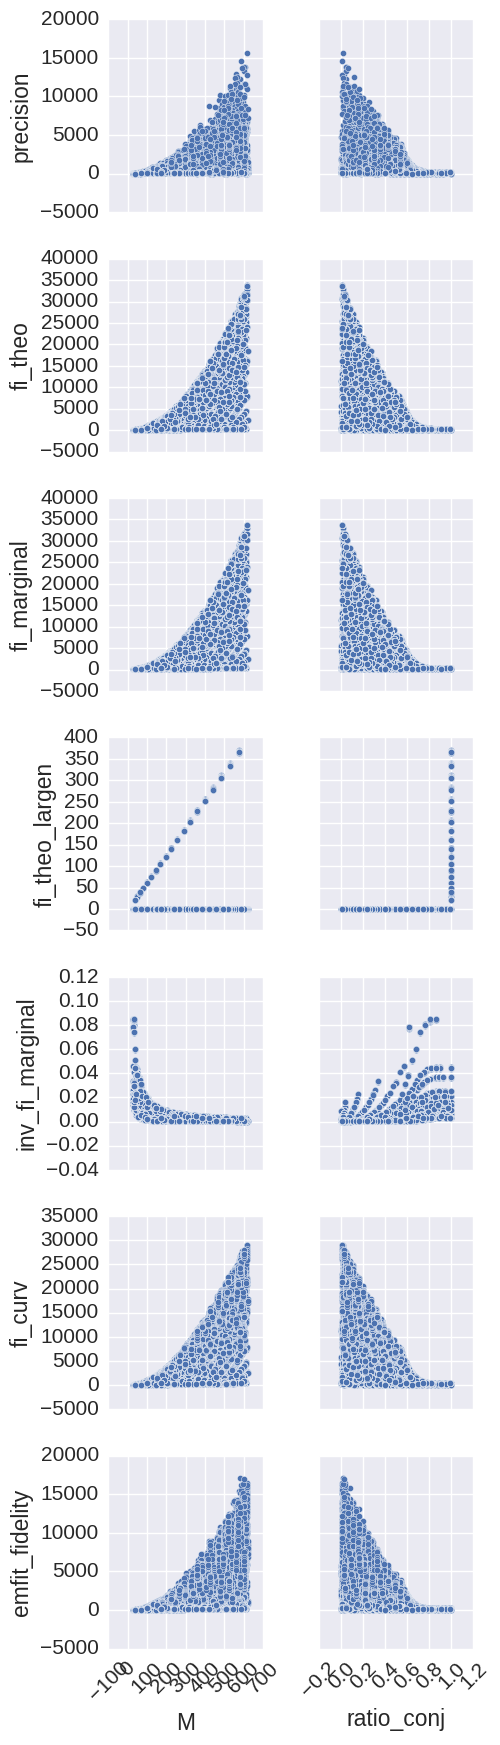

In [47]:
# Cross-correlation plots
g = sns.pairplot(
    df_fits_filtered,
    x_vars=['M', 'ratio_conj'],
    y_vars=['precision', 'fi_theo', 'fi_marginal', 'fi_theo_largen','inv_fi_marginal', 
            'fi_curv', 'emfit_fidelity']
)
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

## Quantize parameters

In [48]:
nQuantiles = 21
parameters = ['M', 'ratio_conj']

df_quantized, param_qbins, param_qbins_middle = df_add_quantize_parameters(df_fits_filtered, parameters, nQuantiles)

## 2D plot M/ratio_conj

In [49]:
def plot_mean_std_df(df, x_col, y_col, param_qbins_middle, xlabel=None, ylabel=None, ax=None):
    df_mean = df.groupby(x_col + "_qi").mean()
    df_std = df.groupby(x_col + "_qi").std()
    
    return utils.plot_mean_std_area(df_mean[x_col], #param_qbins_middle[x_col], 
                                    df_mean[y_col],
                                    df_std[y_col],
                                    xlabel=xlabel,
                                    ylabel=ylabel,
                                    ax_handle=ax,
                                    label=y_col
                                   )

In [50]:
def compute_spline_interpolation(df, interpolate_column, x_col='', y_col='', kx=3, ky=3, s=None):
    
    if interpolate_column + "_std" in df:
        w = 1./df[interpolate_column + "_std"]
    else:
        w = None
        
    return spint.SmoothBivariateSpline(df[x_col], df[y_col], df[interpolate_column], w=w, kx=kx, ky=ky, s=s)

def pcolor_2d_interpolated(df, target_column, x_col='M', y_col='rc_scale', 
                           title='', vmin=None, vmax=None, cmap='RdBu_r'):
    x_int_space = np.sort(df[x_col].unique())
    y_int_space = np.sort(df[y_col].unique())

    spline_int = compute_spline_interpolation(df, target_column, 
                                              x_col=x_col, y_col=y_col)
    return utils.pcolor_2d_data(spline_int(x_int_space, y_int_space),
                                x=x_int_space, 
                                y=y_int_space, 
                                xlabel=x_col, 
                                xlabel_format="%d", 
                                ylabel=y_col, 
                                title=title,
                                ticks_interpolate=15,
                                vmin=vmin,
                                vmax=vmax,
                                log_scale=False, 
                                cmap=cmap
                               )

In [51]:
df_avgstd = df_quantized.groupby(('M', 'ratio_conj'), as_index=False).agg(('mean', 'std')).reset_index()
df_avgstd.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_avgstd.columns.values]
df_avgstd.columns = [s.split('_mean')[0] for s in df_avgstd.columns]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6450f4bf10>,
 <matplotlib.image.AxesImage at 0x7f645104b1d0>)

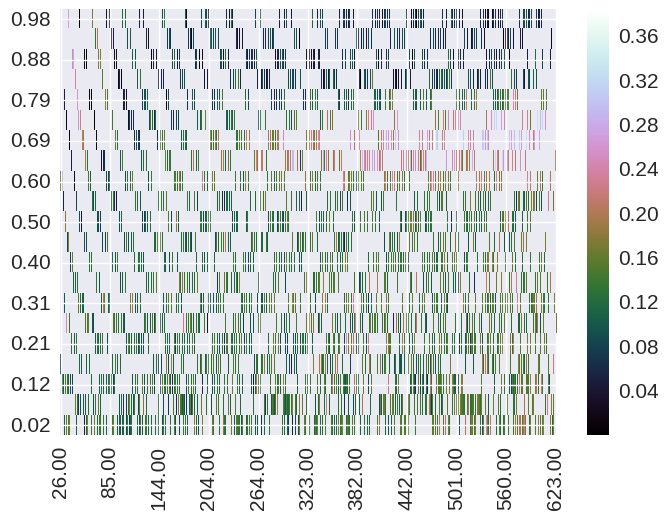

In [52]:
# value = 'precision'
value = 'ratio_fi_fidelity_error'

data_M_ratio = df_avgstd.pivot_table(index='M', columns='ratio_conj_qi', values=value).as_matrix()
utils.pcolor_2d_data(np.abs(data_M_ratio), x=df_avgstd.M.unique(), y=param_qbins_middle['ratio_conj'], 
                     ticks_interpolate=11, cmap='cubehelix')


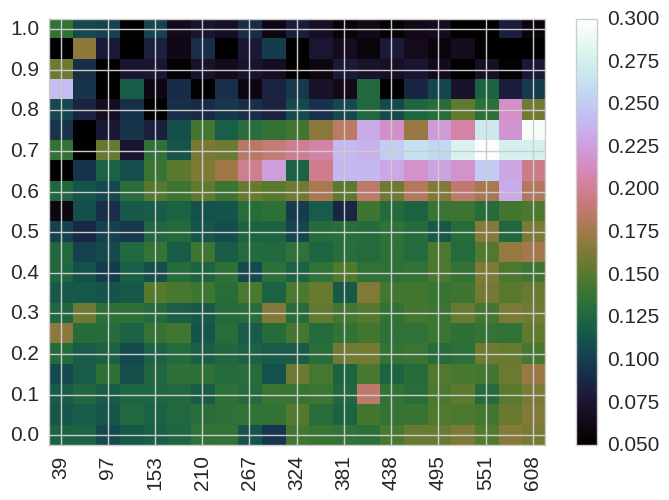

In [54]:
value = 'ratio_fi_fidelity_error'

# data_M_ratio = df_avgstd.pivot_table(index='M', columns='ratio_conj_qi', values=value).as_matrix()
# utils.pcolor_2d_data(np.abs(data_M_ratio), x=param_qbins_middle['M'], y=param_qbins_middle['ratio_conj'], 
#                      ticks_interpolate=8, cmap='Blues_r')

with sns.axes_style('whitegrid'):
    data_M_ratio = df_avgstd.pivot_table(index='M_qi', columns='ratio_conj_qi', values=value).as_matrix()
    utils.pcolor_2d_data(np.abs(data_M_ratio), x=param_qbins_middle['M'], y=param_qbins_middle['ratio_conj'], 
                         ticks_interpolate=11, cmap='cubehelix', vmin=0.05, vmax=0.3, xlabel_format="%d", ylabel_format="%.1f")

dataio.save_current_figure("fisher_fidelity_ratio_deviation_2d_white.pdf")

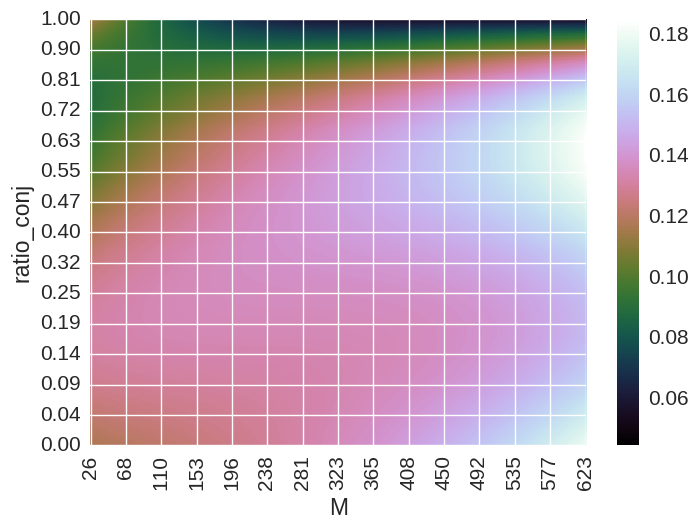

In [28]:
ax, img = pcolor_2d_interpolated(df_avgstd, 'ratio_fi_fidelity_error', x_col='M', y_col='ratio_conj', 
                                 cmap='cubehelix')

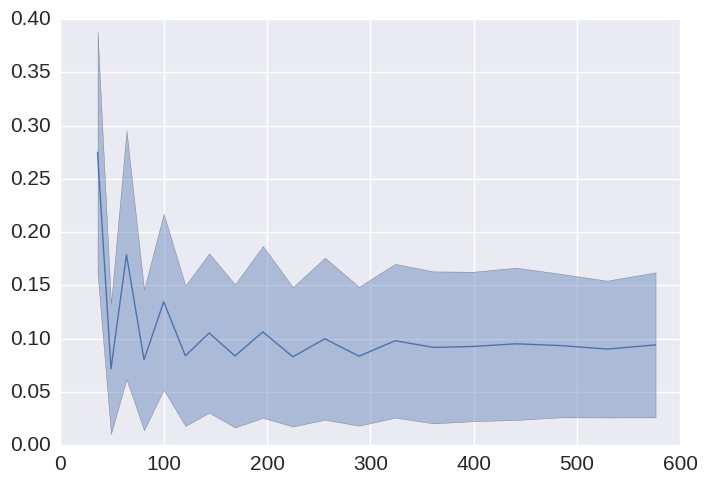

In [29]:
df_conj = df_avgstd[df_avgstd.ratio_conj == 1.].reset_index(drop=True)
utils.plot_mean_std_area(x=df_conj.M, y=df_conj.ratio_fi_fidelity_error, std=df_conj.ratio_fi_fidelity_error_std)

## Comparison plot for specific M


In [30]:
def bars_fisherinfo_comparison(values_bars, 
                               values_bars_std, 
                               values_names, 
                               ax=None, 
                               mem_fidelity_bar_factor=2.0,
                               mem_fidelity_show_main=True):
    color_gen = sns.color_palette(palette='muted', n_colors=len(values_bars))
    # set_colormap = plt.cm.cubehelix

    bars_indices = np.arange(values_bars.size)
    width = 0.7
    if mem_fidelity_bar_factor > 1.:
        zorders = {'main': (2, 3), 'factor': (1, 3)}
        factors = {'main': 1, 'factor': mem_fidelity_bar_factor}
    else:
        zorders = {'main': (1, 2), 'factor': (2, 3)}
        factors = {'main': 1, 'factor': mem_fidelity_bar_factor}

    ## Plot all as bars
    if ax is None:
        f, ax = plt.subplots(figsize=(12,6))
        
    # Add the memory fidelity multiplied by some factor
    if mem_fidelity_show_main:
        ax.bar(bars_indices[0],
               factors['main']*values_bars[0], 
               width=width, 
               color=color_gen[0], 
               zorder=zorders['main'][0])
        ax.errorbar(bars_indices[0] + width/2., 
                    factors['main']*values_bars[0], 
                    yerr=factors['main']*values_bars_std[0], 
                    ecolor='k', 
                    capsize=20, 
                    capthick=2, 
                    linewidth=2,
                    zorder=zorders['main'][1]
                   )

    if mem_fidelity_bar_factor:
        ax.bar(bars_indices[0], 
               factors['factor']*values_bars[0], 
               width=width, 
               color=color_gen[0], 
               alpha=0.7, 
               hatch='/', 
               linestyle='dashed',
               zorder=zorders['factor'][0]
               )
        ax.errorbar(bars_indices[0] + width/2., 
                     factors['factor']*values_bars[0], 
                     yerr=factors['factor']*values_bars_std[0], 
                     ecolor='k', 
                     alpha=0.4, 
                     capsize=20, capthick=2, 
                     linewidth=2, linestyle='--', fmt="none",
                     zorder=zorders['factor'][1]
                    )
        
    for bar_i in xrange(1, values_bars.size):
        ax.bar(bars_indices[bar_i], 
               values_bars[bar_i], 
               width=width, 
               color=color_gen[bar_i], 
               zorder=2)
        ax.errorbar(bars_indices[bar_i] + width/2., 
                    values_bars[bar_i], 
                    yerr=values_bars_std[bar_i], 
                    ecolor='k', 
                    capsize=20, 
                    capthick=2, 
                    linewidth=2, 
                    zorder=3)


    ax.set_xticks(bars_indices + width/2.)
    ax.set_xticklabels(values_names)
    ax.set_xlim((-0.2, bars_indices.size))
    plt.tight_layout()
    
    return ax

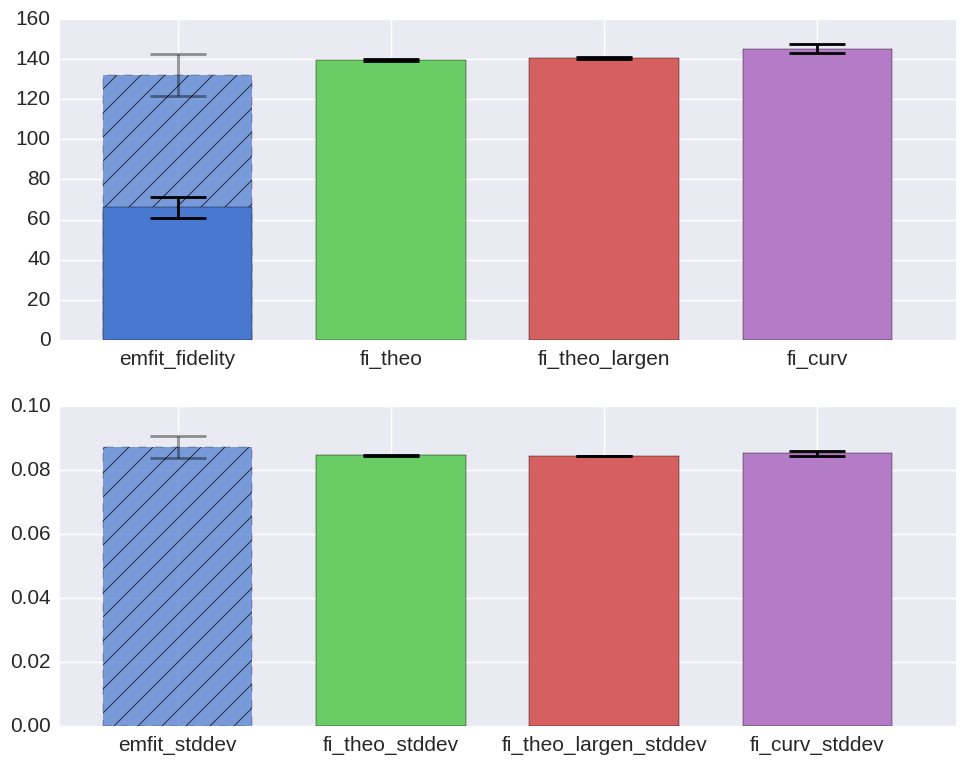

In [37]:
target_M = 15**2.
target_ratio_conj = 1.0
data_M = df_avgstd[(df_avgstd.M == target_M) & (df_avgstd.ratio_conj == target_ratio_conj)].mean()

f, axes = plt.subplots(2, 1, figsize=(10, 8))

values_names = ["emfit_fidelity", "fi_theo", "fi_theo_largen", "fi_curv"]
bars_fisherinfo_comparison(np.array([data_M[k] for k in values_names]), 
                           np.array([data_M[k + "_std"] for k in values_names]), 
                           values_names,
                           ax=axes[0]
                          )

values_names = ["emfit_stddev", "fi_theo_stddev", "fi_theo_largen_stddev", "fi_curv_stddev"]
bars_fisherinfo_comparison(np.array([data_M[k] for k in values_names]), 
                           np.array([data_M[k + "_std"] for k in values_names]), 
                           values_names, 
                           mem_fidelity_bar_factor=0.5**0.5,
                           mem_fidelity_show_main=False,
                           ax=axes[1]
                          )

dataio.save_current_figure("comparison_fisher_fidelity_conv196.pdf")

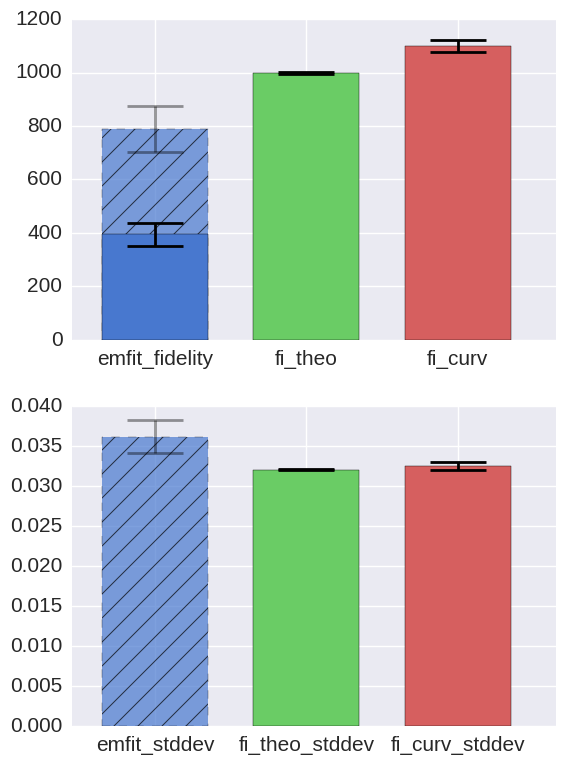

In [32]:
target_M = 519
target_ratio_conj = 0.7
data_M = filter_quantized_param(df_avgstd, {'M': target_M, 'ratio_conj': target_ratio_conj}, param_qbins).mean()

f, axes = plt.subplots(2, 1, figsize=(6, 8))

values_names = ["emfit_fidelity", "fi_theo", "fi_curv"]
bars_fisherinfo_comparison(np.array([data_M[k] for k in values_names]), 
                           np.array([data_M[k + "_std"] for k in values_names]), 
                           values_names,
                           ax=axes[0]
                          )

values_names = ["emfit_stddev", "fi_theo_stddev", "fi_curv_stddev"]
bars_fisherinfo_comparison(np.array([data_M[k] for k in values_names]), 
                           np.array([data_M[k + "_std"] for k in values_names]), 
                           values_names, 
                           mem_fidelity_bar_factor=0.5**0.5,
                           mem_fidelity_show_main=False,
                           ax=axes[1]
                          )

dataio.save_current_figure("comparison_fisher_fidelity_mixed.pdf")